In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
# This file accepts X_test,  y_test, and y_pred (predicted labels from classifier)  data for visualizations.
# also takes in y_score which is the probability from the classifier (log reg, svm) that the data point
# belongs to the positive class
#
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#games1 = pd.read_csv("games.csv", encoding = "ISO-8859-1", index_col=0) games 1 are all contained in the other DF
#games = pd.read_csv("gamesNoPoints.csv", encoding = "ISO-8859-1", index_col=0)


#These are all of the game data pre-dropping all things directly impacting the win
gamesPre = pd.read_csv("games2.csv", encoding = "ISO-8859-1", index_col=0)



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,7,16,21,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#drop all duplicate columns
gamesPre.drop_duplicates()

,season,status,coverage,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,tournament_round,...,opp_fast_break_pts,opp_second_chance_pts,opp_team_turnovers,opp_points_off_turnovers,opp_team_rebounds,opp_flagrant_fouls,opp_player_tech_fouls,opp_team_tech_fouls,opp_coach_tech_fouls,created
game_id,,,,,,,,,,,,,,,,,,,,,
4069f80e-04f0-4f69-a563-86014bbe95a0,2015,closed,full,NaN,12/3/2015,2015-12-03 03:00:00 UTC,NaN,NaN,NaN,NaN,...,0.0,17.0,0.0,31.0,7.0,0,0,0.0,0.0,2018-02-20 15:48:54 UTC
7160a0e0-bbc3-46ad-afc6-e4e6b5b90a51,2015,closed,full,NaN,1/17/2016,2016-01-17 02:00:00 UTC,NaN,NaN,NaN,NaN,...,21.0,16.0,1.0,30.0,3.0,0,0,0.0,0.0,2018-02-20 15:48:54 UTC
320ccf7a-8a32-4ce6-a561-10687985c6a6,2015,closed,full,NaN,12/22/2015,2015-12-22 20:00:00 UTC,NaN,NaN,NaN,NaN,...,26.0,16.0,0.0,36.0,4.0,0,0,0.0,0.0,2018-02-20 15:48:53 UTC
1a689aee-fec2-49df-822d-993e2826744b,2017,closed,full,False,12/10/2017,2017-12-10 00:00:00 UTC,False,NaN,NaN,NaN,...,8.0,21.0,0.0,16.0,0.0,0,0,0.0,0.0,2018-02-20 13:03:23 UTC
6314105c-8456-4b35-bfbf-1ec04749ff09,2017,closed,full,False,12/9/2017,2017-12-09 21:00:00 UTC,False,NaN,NaN,NaN,...,8.0,15.0,0.0,19.0,2.0,0,0,0.0,0.0,2018-02-20 13:03:24 UTC
8240dd38-a137-492d-9468-4f9b11ac4927,2016,closed,full,False,12/10/2016,2016-12-10 22:00:00 UTC,False,NaN,NaN,NaN,...,8.0,24.0,0.0,22.0,1.0,0,0,0.0,0.0,2018-02-20 16:40:00 UTC
6f5cd292-3a1a-4677-9c78-0549fbfc4b72,2016,closed,full,False,11/12/2016,2016-11-12 22:00:00 UTC,False,NaN,NaN,NaN,...,10.0,12.0,0.0,33.0,0.0,0,0,0.0,0.0,2018-02-20 16:40:00 UTC
7a006cde-d6a6-4529-afb5-525888f2dce8,2017,closed,full,False,2/14/2018,2018-02-14 01:00:00 UTC,False,NaN,NaN,NaN,...,16.0,9.0,0.0,24.0,2.0,0,0,0.0,0.0,2018-02-20 13:03:26 UTC
cc33cbca-af83-494e-9439-9e2eacb73a01,2015,closed,full,NaN,11/24/2015,2015-11-24 23:00:00 UTC,NaN,NaN,NaN,NaN,...,2.0,10.0,0.0,12.0,1.0,0,0,0.0,0.0,2018-02-20 15:48:54 UTC


In [4]:
#gamesPre

In [5]:
gamesPre.shape

(51265, 131)

# Preprocess

In [6]:
# Create new column called win. fill row with 1 if points_game > opp_points_game , 0 otherwise
gamesPre['WIN'] = np.where(gamesPre['points_game']>gamesPre['opp_points_game'],1,0)

In [7]:
#count_row = gamesPre.shape[0]
#count_col = gamesPre.shape[1]
#print(count_row)
#print(count_col)

In [8]:
#games = gamesPre.loc[:, gamesPre.columns != ['two_points_att','two_points_made','win','points','points_game','field_goals_att','three_points_made','three_points_att','free_throws_made','free_throws_att','opp_points','opp_points_game','opp_two_points_att','opp_two_points_made','opp_field_goals_att','opp_three_points_made','opp_three_points_att','opp_free_throws_made','opp_free_throws_att']]

In [9]:
#Drop columns directly related to wins
games = gamesPre.drop(['two_points_att','two_points_made','win','points','points_game','field_goals_att','three_points_made','three_points_att','free_throws_made','free_throws_att','opp_points','opp_points_game','opp_two_points_att','opp_two_points_made','opp_field_goals_att','opp_three_points_made','opp_three_points_att','opp_free_throws_made','opp_free_throws_att'],1)

In [10]:
#Remove all non Numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

games = games.select_dtypes(include=numerics)

#NumGamesNoCor.to_csv('numOnlyGames.csv')

In [11]:
count_row = games.shape[0]
count_col = games.shape[1]
#print(count_row)
#print(count_col)

In [12]:
#drop columns that have more than some% of NA's in them

somePcols = .05
countc =0
max_number_of_nas = somePcols*count_col
indexC = 0
listofbadcols=[]

for cols in games:
    if games[cols].isna().sum() > somePcols*count_row:
        print (cols)      
        countc = countc+1
        listofbadcols.extend([indexC])
    indexC = indexC+1
#games = games.loc[:, (games.isnull().sum(axis=0) <= max_number_of_nas)]        
games.drop(games.columns[listofbadcols],axis=1,inplace=True)


print (countc)

ejections
foulouts
fast_break_pts
team_tech_fouls
coach_tech_fouls
opp_ejections
opp_foulouts
opp_fast_break_pts
opp_team_tech_fouls
opp_coach_tech_fouls
10


In [13]:
#drop rows with any NA's in them
nullSumsRows=games.isnull().sum(axis=1)
indexR=0

#rows where there are no NA's
sum0s=0

#rows with some NA's
listofbadrows=[]

for i in nullSumsRows:
    if nullSumsRows[indexR] ==0:
        sum0s=sum0s+1
    #if nullSumsRows[index] > .05*count_row:
        #print(i)
        #print(nullSumsRows[indexR])
    else:
        listofbadrows.extend([indexR])
    indexR=indexR+1  
games=games.drop(games.index[listofbadrows])

In [14]:
#len(listofbadrows)

In [15]:
#sum0s

In [16]:
games.shape

(45650, 49)

In [17]:
#Create a touched up csv file up to this point
#games.to_csv('GamesTouchedUp.csv')

In [18]:
games.var()

season                        1.579664e+00
attendance                    3.461651e+07
lead_changes                  1.901701e+01
times_tied                    1.098651e+01
periods                       1.005051e-01
venue_capacity                3.458870e+07
field_goals_made              2.615991e+01
field_goals_pct               5.804931e+01
three_points_pct              1.298281e+02
two_points_pct                6.504006e+02
blocked_att                   5.866000e+00
free_throws_pct               1.586321e+02
offensive_rebounds            1.391962e+01
defensive_rebounds            2.721021e+01
rebounds                      4.511026e+01
assists                       2.054504e+01
turnovers                     1.598975e+01
steals                        8.228942e+00
blocks                        5.304808e+00
assists_turnover_ratio        5.171487e-01
personal_fouls                2.069438e+01
second_chance_pts             2.868201e+01
team_turnovers                4.498686e-01
points_off_

In [19]:
#Save all variances of each column
gvars=games.var()

# Why does running the variance line below more than once keep dropping more and more columns

In [20]:
#Drop columns with a variance smaller than .2
nonvarientcols=np.where(games.var()<.2)
print (games.columns[nonvarientcols])
games.drop(games.columns[nonvarientcols],axis=1,inplace=True)

Index(['periods', 'flagrant_fouls', 'player_tech_fouls', 'opp_flagrant_fouls',
       'opp_player_tech_fouls'],
      dtype='object')


In [21]:
games.shape

(45650, 44)

In [22]:
#gvars.index[38]

In [23]:
#Func for checking for correlated features and remove them
def removeCorrelation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print('Column ',corr_matrix.columns[i],' is being removed because this cell has a value of ',corr_matrix.iloc[i, j])
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    return dataset

In [24]:
#Create a second DF with no correlated info
GamesNoCor = removeCorrelation(games, .7)

Column  times_tied  is being removed because this cell has a value of  0.7570783241551696
Column  venue_capacity  is being removed because this cell has a value of  0.7439781686697561
Column  field_goals_pct  is being removed because this cell has a value of  0.7552800839624102
Column  rebounds  is being removed because this cell has a value of  0.8334614995360065
Column  opp_field_goals_pct  is being removed because this cell has a value of  0.7575986803247106
Column  opp_two_points_pct  is being removed because this cell has a value of  0.9041918492003679
Column  opp_rebounds  is being removed because this cell has a value of  0.834624252709789
Column  opp_turnovers  is being removed because this cell has a value of  0.7160549876594328
Column  opp_steals  is being removed because this cell has a value of  0.7182649673765734


In [25]:
#GamesNoCor.to_csv('noCovGames.csv')

In [26]:
GamesNoCor.shape

(45650, 35)

In [27]:
#Split into labels and non
X = GamesNoCor.loc[:, GamesNoCor.columns != 'WIN']
y = GamesNoCor.loc[:, GamesNoCor.columns == 'WIN']

#X = games.loc[:, games.columns != 'WIN']
#y = games.loc[:, games.columns == 'WIN']

In [28]:
#X

In [29]:
#redo logistic regression
logit_model=sm.Logit(y,X)
result=logit_model.fit()
#print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.136999
         Iterations 10


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)
y_score = logreg.predict_proba(X_test)[:,1]
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94034


In [32]:
#y_pred

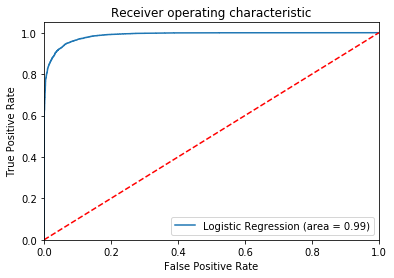

In [33]:
logit_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score) # gets false pos rate, true pr, and thresh
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
for game1 in games1.index:
        if game1 in games2.index:
            print (game1)
            game1sINgame2= game1sINgame2+1
        

NameError: name 'games1' is not defined

In [ ]:
game1sINgame2